by: Juan David Gomez Villalba

### Domain-specific area

Product reviews are a key source of feedback for any business, especailly in the predominance of E-commerce on our society nowadays. Being able to accurately analyze the sentiments of the consumers in these reviews can help businesses understand customer satisfaction, improve their products, gain insight into the mind of the buyers and increase customer retention. 

The reviews have advanced from being a simple way to share our expereinces with a product to a principal force that influences the potential buyers into making a purcharse or chossing another product. Thus, the product reviews have become a wealth of unstructored data that can provide valuable insights and be used in many ways.

Natural Language Processing (NLP) gives us the perfect tools to create classifiers that will help to attach a sentiment to the vast amount of product reviews. In this project I will aim to create a sentiment analyser for Books sold in Amazon, and classify them into Positive, Neutral and Negative.

This idea has been researched before specially in (Mullen & Collier, 2004) "With text classification techniques, such as sentiment analysis, businesses can automatically categorize reviews into distinct classes (positive, negative, neutral), which can significantly enhance their understanding of customer sentiment at scale"

Mullen, T., & Collier, N. (2004). Sentiment analysis using support vector machines with diverse information sources. In Proceedings of EMNLP 2004 (pp. 412-418).

### Objectives

+ Sentiment analysis of amazon product reviews: develop a analysis model that can categorize the product reviews into positive, neutral, or negative sentiments.
+ Dataset Identification and Collection: obtaining a good dataset with rich features that would be suitable for the project.
+ Cleaning and Preprocessing: Thorough cleaning and preprocessing of the dataset this involves removing irrelevant information and null values, correcting errors, handling missing values, and converting text into a format that the model can interpret.
+ Baseline Model Creation: Creation of a basic inital model to set a benchmark for perfomance.
+ Model Evaluation and Planning: Research will be conducted to find the best type of model to be used.
+ Testing and Evaluation: Thorough testing and training of the model by using multiple techniques and cross-validation
+ Presentation and Findings: presenting the findings of the project and the best model found.

### Contributions

+ Competitive analysis: by using the classifer to understand what costumers like and dislike of a certain product and how to gain an edge againg the competitors
+ Product Development: by understaing the costumer sentiments, the store owners check the weaknesses of their products and plan how to fix them
+ Trend discovery: by using the classifier over time society shifts could be detected which would help businesses to stay on top of the latest trends.


### Dataset

Amazon Customer Reviews Dataset

"Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazon’s iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews." (Amazon, https://s3.amazonaws.com/amazon-reviews-pds/readme.html)

The [LICENSE](https://s3.amazonaws.com/amazon-reviews-pds/license.txt) allows the use of the data for purposes of academic research.

The dataset used comes in the format of a Tab separated value (TSV) which needs to be downloaded via Amazon s3 and extracted locally. This includes a collection of millions of product reviews and associated metadata from 1995 until 2015. where each file contains a certain type of products. For this project the amazon_reviews_us_Books_v1_02.tsv (3.02 GB) dataset was used.

Details about the data colums are as follow:

*taken from [https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt](https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt)

DATA COLUMNS:

+ marketplace: 2 letter country code of the marketplace where the review was written.
+ customer_id: Random identifier that can be used to aggregate reviews written by a single author.
+ review_id: The unique ID of the review.
+ product_id: The unique Product ID the review pertains to. In the multilingual dataset the reviews for the same product in different countries can be grouped by the same product_id.
+ product_parent: Random identifier that can be used to aggregate reviews for the same product.
+ product_title: Title of the product.
+ product_category: Broad product category that can be used to group reviews (also used to group the dataset into coherent parts).
+ **star_rating**: The 1-5 star rating of the review.
+ helpful_votes: Number of helpful votes.
+ total_votes: Number of total votes the review received.
+ vine: Review was written as part of the Vine program.
+ verified_purchase: The review is on a verified purchase.
+ **review_headline**: The title of the review.
+ **review_body**: The review text.
+ review_date: The date the review was written.

### Evaluation methodology

Multiple metrics will be used:

+ Cross-validation scores: Used to estimate the model perfomance on unseen data by splitting the data into multiple folds and training and testing the model in different combinations, this method allows us to use all the data instead of using a hold-out set for training and testing.

+ Accuracy: To measure the proportion of correct predictions made by the model, in this case what class the review belongs to.

+ Precision: To measure what porcentage of all the predictions made were actually correct.

+ Recall: To know what proportion of the positve reviews were actually positive.

+ F1-Score: the mean of Precision and Recall, useful to tell if the model has a balanced performance.

By using all these metrics we get a good overview of the models perfomances that will help into gaining insights, refining the models and measuring performance.

### Implementation

In [75]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kayaba_attribution/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/kayaba_attribution/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/kayaba_attribution/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kayaba_attribution/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
# Pre-processing
# load the data from the csv file amazon_reviews_us_Books_v1_02.tsv
# and view the head of the data
df = pd.read_csv('amazon_reviews_us_Books_v1_02.tsv', sep='\t', on_bad_lines='skip')
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12076615,RQ58W7SMO911M,0385730586,122662979,Sisterhood of the Traveling Pants (Book 1),Books,4.0,2.0,3.0,N,N,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14
1,US,12703090,RF6IUKMGL8SF,0811828964,56191234,The Bad Girl's Guide to Getting What You Want,Books,3.0,5.0,5.0,N,N,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14
2,US,12257412,R1DOSHH6AI622S,1844161560,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",Books,4.0,1.0,22.0,N,N,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14
3,US,50732546,RATOTLA3OF70O,0373836635,348672532,Colby Conspiracy (Colby Agency),Books,5.0,2.0,2.0,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14
4,US,51964897,R1TNWRKIVHVYOV,0262181533,598678717,The Psychology of Proof: Deductive Reasoning i...,Books,4.0,0.0,2.0,N,N,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14


In [47]:
# get info about the data specifically the number of rows, and types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105370 entries, 0 to 3105369
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   marketplace        object 
 1   customer_id        int64  
 2   review_id          object 
 3   product_id         object 
 4   product_parent     int64  
 5   product_title      object 
 6   product_category   object 
 7   star_rating        float64
 8   helpful_votes      float64
 9   total_votes        float64
 10  vine               object 
 11  verified_purchase  object 
 12  review_headline    object 
 13  review_body        object 
 14  review_date        object 
dtypes: float64(3), int64(2), object(10)
memory usage: 355.4+ MB


In [48]:
# remove the columns that are not needed for the analysis
df = df.drop(columns=['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'vine', 'verified_purchase', 'review_date', 'helpful_votes', 'total_votes'])
df.sample(5)

,star_rating,review_headline,review_body
2579482,4.0,A great help!,This book is a great help for one interested i...
2130968,4.0,Very Good Book Even if You Know Wagner Well,This book should serve as an excellent and ver...
1149988,5.0,Journey to the Center of the Earth,"As an avid reader of Jules Verne, I enjoyed re..."
1582371,5.0,Great fun,"In this book, Stephenson introduces us to Sang..."
1716679,4.0,David Rocks...,"Good, but slightly repetitive of his previous ..."


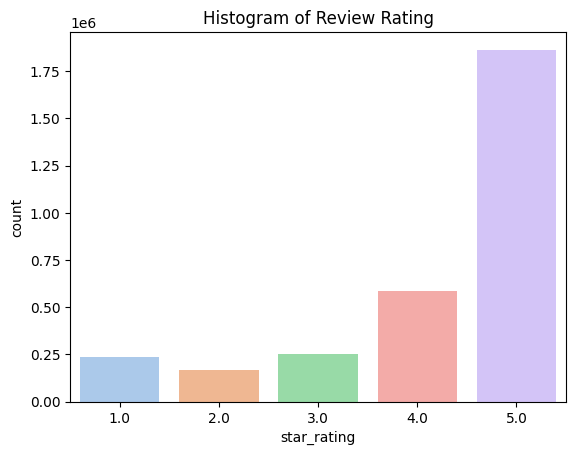

In [49]:
# create a histogram of the star_rating column
# to see the distribution of the ratings

sns.countplot(x='star_rating', data=df, palette='pastel')
plt.title('Histogram of Review Rating')
plt.show()

+ there are more than 1.75M 5-star reviews
+ I will get 10,000 reviews for each unique star_rating to:
    + decrease the amount of data
    + increase training speed
    + have a better representation and distribution
+ check for duplicate and missing values 

In [50]:
dup = df.duplicated().sum()
na = df.isna().sum()

print(f'Number of duplicate rows: {dup} \nNumber of NA rows:\n{na}')

Number of duplicate rows: 29378 
Number of NA rows:
star_rating         4
review_headline    57
review_body         4
dtype: int64


In [51]:

df = df.drop_duplicates()
df = df.dropna()

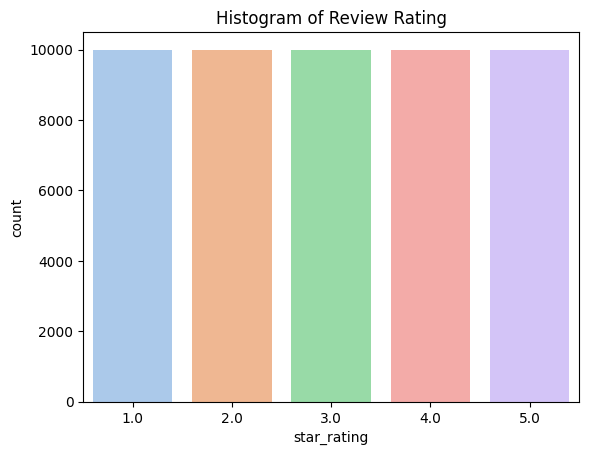

In [52]:
# create a new balanced dataframe with 10,000 samples of each rating
# show new histogram of the balanced dataframe
frames = []
for rating in df['star_rating'].unique():
    temp = df[df['star_rating'] == rating]
    n_samples = min(len(temp), 10000)
    frames.append(temp.sample(n=n_samples))

balanced_df = pd.concat(frames)

sns.countplot(x='star_rating', data=balanced_df, palette='pastel')
plt.title('Histogram of Review Rating')
plt.show()

In [53]:
# save the balanced dataframe to a csv file named balanced_reviews.csv
balanced_df.to_csv('balanced_reviews.csv', index=False)

df = pd.read_csv('balanced_reviews.csv')

In [61]:
# helpers

def label_encode(x):
    if x == 1 or x == 2:
        return 0
    if x == 3:
        return 1
    if x == 5 or x == 4:
        return 2
    
def label_name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

# create a new column named label that is the encoded version of the star_rating column
# create a new column named label_name that is the string version of the label column
df["label"] = df["star_rating"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label_name(x))

df.sample(5)


,star_rating,review_headline,review_body,label,label_name
21118,5.0,This is a great series and book!,"I really enjoyed this series, especially &quot...",2,Positive
6950,4.0,what I'd do if I had the time,Po Bronson has done what I wish I could have d...,2,Positive
31766,2.0,Not useful,"When I looked through Dearborn Series 66 book,...",0,Negative
16373,3.0,Its alright,"This book is pretty good, but like reviewers h...",1,Neutral
39349,2.0,The author's facts are not of PhD caliber,The book is fully packed of information. But t...,0,Negative


### Normalize Text

+ Tokenize: breaking up the reviews into individual words
+ Lower case and punctuation: mainly to avoid duplication of words (Don't/Dont/dont)
+ Remove stopwords: remove words with no significant meaning, reduce size, increase speed
+ Lemmatization: reduce the words to their base root

The result is a bag of words where each unique word is a feature to be used by the models

In [63]:
stop_words = set(stopwords.words('english')) # choose a set of stop words
lemmatizer = WordNetLemmatizer() # create a lemmatizer

def normalize_text(text):
    words = word_tokenize(text) # tokenize the review text
    words = [word.lower() for word in words if word.isalpha()] # remove punctuation and numbers
    words = [word for word in words if not word in stop_words] # remove stop words
    words = [lemmatizer.lemmatize(word) for word in words] # lemmatize the words
    return ' '.join(words)

# apply the normalize_text function to the review_headline and review_body columns
df['review_headline'] = df['review_headline'].apply(normalize_text)
df['review_body'] = df['review_body'].apply(normalize_text)

# save the preprocessed dataframe to a csv file named preprocessed_reviews.csv
df.to_csv('preprocessed_reviews.csv', index=False)

In [39]:
# create a cloud word to inspect the most common words in certain columns

def create_word_cloud(column):
    for rating in df['star_rating'].unique(): # for each rating
        text = ' '.join(df[df['star_rating'] == rating][column]) # join all the reviews for that rating and column
        # generate the word cloud and show it
        wordcloud = WordCloud(max_font_size=70, max_words=200, background_color="white").generate(text)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(f'Word Cloud for {column} rating {rating}')
        plt.axis("off")
        plt.show()

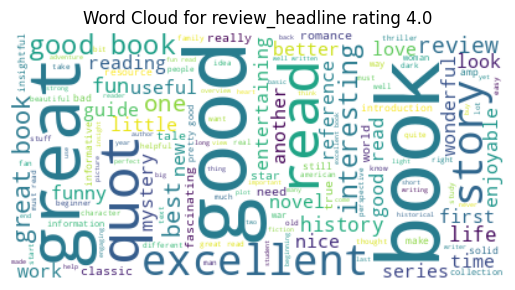

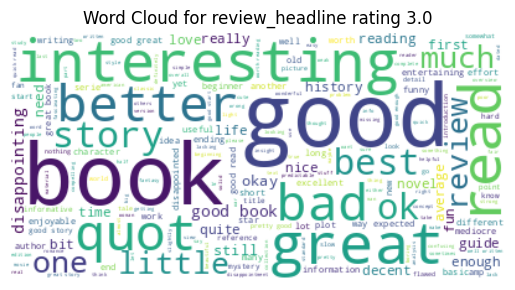

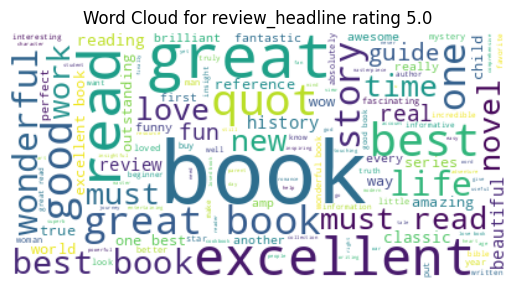

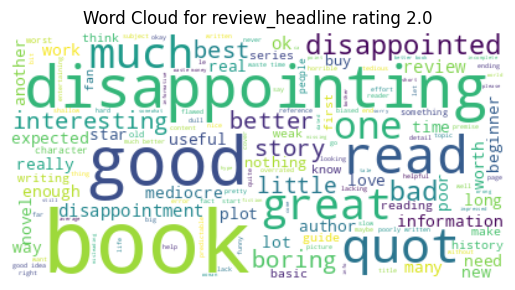

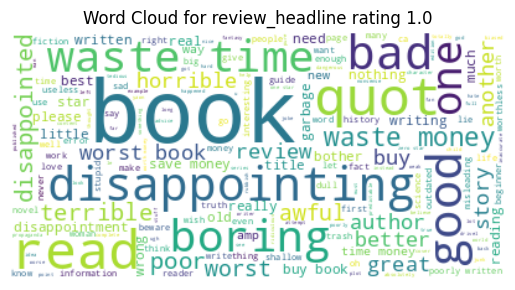

In [64]:
create_word_cloud('review_headline')

> *note that the words become more negative as the rating goes down

In [65]:
# remove extra unwanted words br, quot
df['review_headline'] = df['review_headline'].apply(lambda x: x.replace('br', ''))
df['review_headline'] = df['review_headline'].apply(lambda x: x.replace('quot', ''))
df['review_body'] = df['review_body'].apply(lambda x: x.replace('br', ''))
df['review_body'] = df['review_body'].apply(lambda x: x.replace('quot', ''))

#### check that the previous step worked and that the preprocessing is complete

by taking random samples from the text

In [69]:
random_rows = df.sample(5) # get 5 random rows from the dataframe

for index, row in random_rows.iterrows(): # for each row get info about the sample and show it
    star_rating = row['star_rating']
    review_headline = row['review_headline']
    review_body = row['review_body']
    label = row['label']
    label_name = row['label_name']

    print("Sample", index+1)
    print("Star Rating:", star_rating)
    print("Review Headline:", review_headline)
    print("Review Body:", review_body)
    print("Label:", label)
    print("Label Name:", label_name)

Sample 37502
Star Rating: 2.0
Review Headline: heavy feminism
Review Body: fact book seem complete accurate learn annie oakley deliberately lose shooting match frank butler  annie get gun  product unfeminist  information trial oakley early life especially interesting felt book bogged author began trying fit oakley feminist straitjacket relating everything connection woman right also grew tired hearing sweet feminine ladylike oakley
Label: 0
Label Name: Negative
Sample 11750
Star Rating: 3.0
Review Headline: diminished blavatsky
Review Body: eager read novel helena blavatsky henry olcott founder theosophy thought author better henry olcott ben novel blavatsky irinia novel often irinia comic butt ben good sense serious spiritual quest liked description india loved supposed excerpt blavatsky tale olcott journal shadow elephant make almost wholly neurotic fraud giving explanation spiritual power exerts follower even today
Label: 1
Label Name: Neutral
Sample 23847
Star Rating: 5.0
Review He

In [17]:
# suffle the dataframe jsut to make sure the data is not ordered in any way
df = df.sample(frac=1, random_state=15)

### Baseline performance

Decided to make use of the NLTK Valence Aware Dictionary and sEntiment Reasoner (VADER) which is a lexicon and rule-based sentiment analysis tool which is tuned to work well on social media posts.

It was chosen because:

+ easy to implement
+ simple starting point
+ does not require training data
+ easy to get evalutation stats

In more detail VADER adds up the scores of all the words and calculates the overall sentiment of the text.

In [74]:

SIA = SentimentIntensityAnalyzer() # create a sentiment intensity analyzer

df['review'] = df['review_headline'] + " " + df['review_body'] # join the review headline and body
df['sentiment_scores'] = df['review'].apply(lambda review: SIA.polarity_scores(review)) # get sentiment scores
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound']) # get aggregate sentiment

# clasify sentiments as positive, neutral and negative
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound_score'].apply(classify_sentiment)

# get evaluation metrics and print them
accuracy = accuracy_score(df['label_name'], df['sentiment'])
report = classification_report(df['label_name'], df['sentiment'])
print(f"accuracy: {accuracy}")
print(f"classification_report: \n{report}")

accuracy: 0.49588
classification_report: 
              precision    recall  f1-score   support

    Negative       0.66      0.34      0.45     20000
     Neutral       0.18      0.02      0.03     10000
    Positive       0.46      0.89      0.61     20000

    accuracy                           0.50     50000
   macro avg       0.44      0.42      0.36     50000
weighted avg       0.49      0.50      0.43     50000



### Baseline Model Evaluation

+ Better at detecting positive reviews, with recall of 89%, but with a precision of only 46% it could mean that the model is classifying more reviews as positive even if they are not
+ Very bad at detecting neutral reviews, with recall of 2%, and a precision of only 18% there needs to be more focus into neutral sentiments
+ Mediocre at detecting negative reviews, with recall of 34% and a precision of 66%
+ The overall accuracy is only 49.6%, it has lots of room for improvement
+ The language in neutral reviews is ambiguous and less distinctive than positive and negative reviews

## Classification approach


First approach:

- Use the review_headline and review_body columns as features
- Use the label column as the target
- Make a pipeline that uses vectorization and Naive Bayes algorithm
- Get 5 stratified folds from the df
- Evaluate scores using cross-validation

TfidfVectorizer "Term Frequency-Inverse Document Frequency" it considers the freq of a word in a review and the freq of the word in the whole dataset

MultinomialNB is an implementation of the Naive Bayes algorithm which works well for classification tasks

The pipeline then transforms the data into TF-IDF features and then uses them to train the Naive Bayes classifier

StratifiedKFold crates 5 folds of aprox same percentage of pre-shuffled data

cross_val_score evaluates the model using cross-validation, it uses scoring as the evaluation metric

Cross-validation scores:  [0.6762 0.6762 0.6789 0.6732 0.6752]
Mean cross-validation score:  0.67594
Accuracy: 0.67594
Precision: 0.5414414828082846
Recall: 0.67594
F1-Score: 0.6009548343334653
              precision    recall  f1-score   support

           0       0.66      0.86      0.75     20000
           1       0.00      0.00      0.00     10000
           2       0.70      0.83      0.76     20000

    accuracy                           0.68     50000
   macro avg       0.45      0.56      0.50     50000
weighted avg       0.54      0.68      0.60     50000



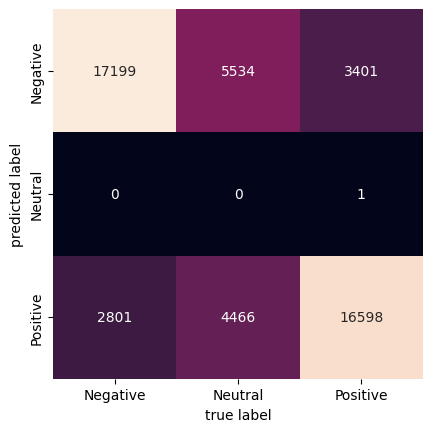

In [81]:
X = df['review']
y = df['label']

model = make_pipeline(TfidfVectorizer(), MultinomialNB()) # create a pipeline

# 5 Fold Cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", np.mean(scores))

y_pred = cross_val_predict(model, X, y, cv=cv) # get cross-validated predictions

# get evaluation metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# show the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

class_labels = ["Negative", "Neutral", "Positive"]

confusionMx = confusion_matrix(y, y_pred) # confusion matrix based on cross-validation

sns.heatmap(confusionMx.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels) # plot the confusion matrix

plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(y, y_pred)) # print the classification report

#### First Approach Evaluation

+ Considerable improvement from Accuracy from 49.5% to 68%
+ Very good recall of positives 86% but with a slight above average of precision 66%
+ Very good recall of negatives 83% but with a slight above average of precision 70%
+ Completely fails on neutral reviews with a recall of 0%
+ Naive Bayes does very well at distinguishing between negative and positive sentiments but lacks the ability to detect neutral sentiments

### Final Approach 

Change MultinomialNB for a Support Vector Classifier (SVC)

LinearSVC tries to find the best margin that separates the classes and performs well with overlapping classes that is what we need to solve the issue of not getting any neutral sentiments.

Multinomial Naive Bayes assumed feature independence, in reviews where words depend on each other SVC is the better alternative

Finally, SVC supports regularization which prevents overfitting by adding a penalty to the loss function

Cross-validation scores:  [0.7056 0.7058 0.706  0.7128 0.7111]
Mean cross-validation score:  0.70826
Accuracy: 0.70826
Precision: 0.681326489603041
Recall: 0.70826
F1-Score: 0.6757602145137741
              precision    recall  f1-score   support

           0       0.73      0.83      0.77     20000
           1       0.51      0.18      0.27     10000
           2       0.72      0.85      0.78     20000

    accuracy                           0.71     50000
   macro avg       0.65      0.62      0.61     50000
weighted avg       0.68      0.71      0.68     50000



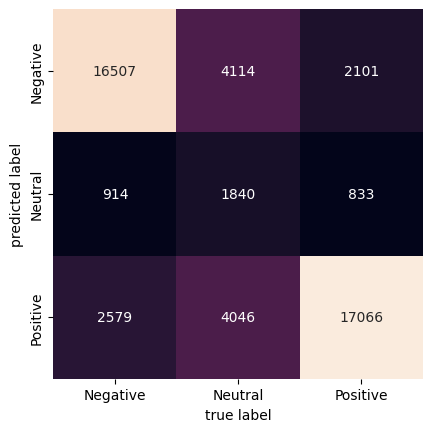

In [85]:

model = make_pipeline(
    TfidfVectorizer(max_features=10000), # max words to consider (optimization)
    LinearSVC(dual=False,C=0.1, # regularization parameter (optimization)
        tol=1e-4) # stop criterion tolerance (optimization)
    ) # create a pipeline

# 5 Fold Cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", np.mean(scores))

y_pred = cross_val_predict(model, X, y, cv=cv) # get cross-validated predictions

# get evaluation metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# show the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

class_labels = ["Negative", "Neutral", "Positive"]

confusionMx = confusion_matrix(y, y_pred) # confusion matrix based on cross-validation

sns.heatmap(confusionMx.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels) # plot the confusion matrix

plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(y, y_pred)) # print the classification report


### Final Approach Evaluation

Multinomial Naive Bayes vs Linear Support Vector Classifier 

+ Improvement in accuracy from 68% to 71%
+ Improvement in precision for negatives from 66% to 73% and for positives from 70% to 72%
+ **Major Improvement in precision for neutral reviews from 0% to 51%** 
+ Improvement in recall for neutral reviews from 0% to 18%
+ Improvement in F1-score for all classes
+ Sligth decrease in recall for negative and positive reviews -3% and -2% respectively

#### Comparison table:

| Approach | Precision (Negative) | Precision (Neutral) | Precision (Positive) | Recall (Negative) | Recall (Neutral) | Recall (Positive) | F1-Score (Negative) | F1-Score (Neutral) | F1-Score (Positive) | Accuracy |
| -------- | -------------------- | ------------------- | -------------------- | ---------------- | ---------------- | ---------------- | ------------------ | ------------------ | ------------------ | -------- |
| BLn    | 0.66                 | 0.18                | 0.46                 | 0.34             | 0.02             | 0.89             | 0.45                | 0.03                | 0.61                | 0.50     |
| NB       | 0.66                 | 0.00                | 0.70                 | 0.86             | 0.00             | 0.83             | 0.75                | 0.00                | 0.76                | 0.68     |
| SVC      | 0.73                 | 0.51                | 0.72                 | 0.83             | 0.18             | 0.85             | 0.77                | 0.27                | 0.78                | 0.71     |

#### Final Classification approach iprovement over Baseline

| Metric           | VADER | SVC  | Improvement |
| ---------------- | ----- | ---- | ----------- |
| Precision (Negative) | 0.66 | 0.73 | +0.07    |
| Precision (Neutral)  | 0.18 | 0.51 | +0.33    |
| Precision (Positive) | 0.46 | 0.72 | +0.26    |
| Recall (Negative)    | 0.34 | 0.83 | +0.49    |
| Recall (Neutral)     | 0.02 | 0.18 | +0.16    |
| Recall (Positive)    | 0.89 | 0.85 | -0.04    |
| F1-Score (Negative)  | 0.45 | 0.77 | +0.32    |
| F1-Score (Neutral)   | 0.03 | 0.27 | +0.24    |
| F1-Score (Positive)  | 0.61 | 0.78 | +0.17    |
| Accuracy             | 0.50 | 0.71 | +0.21    |

### Conclusions

In this project we worked on the journey to analyze customer sentiments on Amazon book product reviews by using NLP techniques the goal was to classify the sentiments in those reviews into positive, neutral, or negative.

The Amazon Customer Reviews dataset was used as a rich source of raw textual data, it was cleaned, preprocessed, and prepared for the task of sentiment analysis. The initial baseline model, VADER from the NLTK library, provided a simple but insightful benchmark.

The first attempt for classification used a combination of TfidfVectorizer and the Multinomial Naive Bayes classifier. Although this model performed decently for positive and negative reviews it had a major flaw: it was unable to classify neutral sentiments effectively. This led me to the exploration of Support Vector Classifier (SVC), which proved to be an effective solution, outperforming the initial baseline and first approach, while also addressing the issue of neutral sentiments.

The work achived in this project considerably improves the knowledge of large-scale customer sentiment, facilitating companies in pinpointing potential enhancements, competitive advantages, and evolving trends. It also demonstrates the practicality of using NLP techniques in sentiment analysis and offers a blueprint for carrying out similar tasks with other datasets.

The final classification approach used in this project is ready to be adapted to other specific aspects that depend on customer reviews for feedback such as sectors like electronics, clothing, movies, and others. The procedure and steps done, from data cleaning to choosing the model, can be duplicated, although with some changes depending on the specific challenges of the chosen problems. Although SVC was found to be effective for this project, other models could have also have been used for example deep learning models like LSTM networks could have got better results but the complexity and training time would also increase.

The methodology and steps in this project can be replicated in any programming language, given that almost all of them support data preprocessing and model training, however libraries such sklearn and nltk make things much more easier, thus choosing programming languages that support them is greatly advisable.

Finally, looking back at the final approach, other methods could have been used such as word embeddings like Word2Vex that could capture more semantic meanings and increase the model accuracy and ensemble methods which combine different models could have increased the accuracy even more.

